## Copy data to new directory

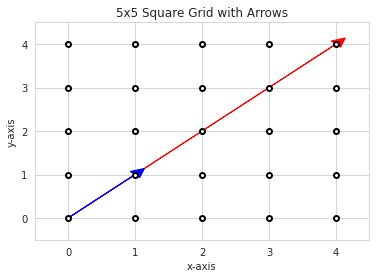

In [7]:
import matplotlib.pyplot as plt

# Define the grid
x = [0, 1, 2, 3, 4]
y = [0, 1, 2, 3, 4]

# Define the arrow endpoints
arrow1_start = [0, 0]
arrow1_end = [4, 4]
arrow2_start = [0, 0]
arrow2_end = [1, 1]

# Create the plot
fig, ax = plt.subplots()

# Plot the grid
for i in range(len(x)):
    for j in range(len(y)):
        ax.plot(x[i], y[j], 'o', color='white', markersize=5, mec='black', mew=2)

# Add the arrows to the plot
ax.arrow(arrow1_start[0], arrow1_start[1], arrow1_end[0]-arrow1_start[0], arrow1_end[1]-arrow1_start[1],
         head_width=0.2, head_length=0.2, fc='red', ec='red')
ax.arrow(arrow2_start[0], arrow2_start[1], arrow2_end[0]-arrow2_start[0], arrow2_end[1]-arrow2_start[1],
         head_width=0.2, head_length=0.2, fc='blue', ec='blue')

# Set the axis range and gridlines
ax.set_xlim([-0.5, 4.5])
ax.set_ylim([-0.5, 4.5])
ax.set_xticks(x)
ax.set_yticks(y)
ax.grid(True)

# Set the axis labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# Set the plot title
ax.set_title('5x5 Square Grid with Arrows')

plt.savefig("/home/dell/clash/demo.png",dpi=300)
# Show the plot
plt.show()

In [4]:
import numpy as np

# Generate 1000 random 100x1 vectors
x = np.random.rand(1000, 100)

# Initialize vector d
d = np.zeros((100, 1))

# Define the target mean correlation
target_mean_corr = -0.1

# Iterate until the mean correlation is close enough to the target value
i =0
while i>10000:
    print(i)
    # Calculate the correlations between x and d
    corrs = np.dot(x, d)

    # Calculate the current mean correlation
    mean_corr = np.mean(corrs)

    # Calculate the correlation adjustment factor
    corr_adjustment = target_mean_corr - mean_corr

    # If the mean correlation is close enough to the target value, exit the loop
    if abs(corr_adjustment) < 0.01:
        break

    # Update d by adjusting the correlations with the adjustment factor
    d += (corr_adjustment * x.mean(axis=0)).reshape(-1, 1)
    i+=1

# Check that the final mean correlation is close enough to the target value
final_mean_corr = np.mean(np.dot(x, d))
print("Final mean correlation:", final_mean_corr)

Final mean correlation: 0.0


In [1]:
import os
import shutil
import pandas as pd
from os.path import join as opj

source_dir = r'/mnt/data/Project/DCM/BIDS/BIDS'
output_dir = r'/mnt/data/tmp/Data2Heli'
# read data from source directory
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')

# copy meg data
data = participants_data.query('meg_neuro==1')
pid = data['Participant_ID'].to_list()
subject_list = pid
subject_list = ['sub_'+str(id).zfill(3) for id in range(64,83)]

# creat directory structure in output directory
def copy_meg_resting(sub_id):
    original_dir = r'/mnt/workdir/DCM/sourcedata'
    output_dir = '/mnt/data/tmp/Data2Heli'

    sourMegDir = opj(original_dir, sub_id, 'NeuroData','MEG')
    targMegDir = opj(output_dir, sub_id, 'MEG')

    if not os.path.exists(targMegDir):
        os.makedirs(targMegDir)

    file_list = os.listdir(sourMegDir)
    target_files = []
    for f in file_list:
        if 'rest' in f:
            target_files.append(f)
        else:
            continue

    for target_file in target_files:
        source_file_path = opj(sourMegDir,target_file)
        target_file_path = opj(targMegDir,target_file)
        if '.fif' in target_file:
            shutil.copy(source_file_path,target_file_path)
        elif '.ds' in target_file:
            shutil.copytree(source_file_path,target_file_path)

for sub in subject_list:
    copy_meg_resting(sub)

In [9]:
import os
import shutil
import pandas as pd
from os.path import join as opj
# copy fmri resting data and T1
def copy_mri_resting(sub_id):
    original_dir = r'/mnt/workdir/DCM/BIDS'
    output_dir = '/mnt/data/tmp/Data2HNY'

    sourMriDir = opj(original_dir, sub_id)
    targMriDir = opj(output_dir, sub_id.replace('-','-'))

    if not os.path.exists(targMriDir):
        os.makedirs(targMriDir)
    else:
        return

    mri_modes = ['anat','func','dwi']

    for mode in mri_modes:
        if mode in ['anat','dwi']:
            source_file_path = opj(sourMriDir,mode)
            target_file_path = opj(targMriDir,mode)
            try:
                shutil.copytree(source_file_path,target_file_path)
            except:
                print("The ",sub_id,"didn't have", mode)
                continue

        elif mode == 'func':
            file_list = os.listdir(opj(sourMriDir,'func'))
            target_files = []
            for f in file_list:
                if 'rest' in f:
                    target_files.append(f)
                    #print(f)
                else:
                    continue
            for target_file in target_files:
                source_file_path = opj(sourMriDir,mode,target_file)
                target_file_path = opj(targMriDir,mode,target_file)
                if not os.path.exists(opj(targMriDir,mode)):
                    os.makedirs(opj(targMriDir,mode))
                shutil.copy(source_file_path,target_file_path)

participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')

# copy meg data
data = participants_data.query('game1_fmri>=0.5')
subject_list = data['Participant_ID'].to_list()
subject_list = [s.replace('-','-') for s in subject_list]
subject_list.remove('sub-015')

for sub in subject_list:
    copy_mri_resting(sub)

The  sub-010 didn't have dwi
The  sub-016 didn't have dwi


In [29]:
subject_list[0].rep

['sub_010',
 'sub_011',
 'sub_012',
 'sub_015',
 'sub_016',
 'sub_017',
 'sub_018',
 'sub_022',
 'sub_023',
 'sub_024',
 'sub_025',
 'sub_027',
 'sub_029',
 'sub_031',
 'sub_032',
 'sub_033',
 'sub_036',
 'sub_037',
 'sub_043',
 'sub_046',
 'sub_047',
 'sub_048',
 'sub_049',
 'sub_050',
 'sub_053',
 'sub_055',
 'sub_056',
 'sub_059',
 'sub_060',
 'sub_061',
 'sub_062',
 'sub_063',
 'sub_064',
 'sub_065',
 'sub_067',
 'sub_068',
 'sub_069',
 'sub_070',
 'sub_071',
 'sub_072',
 'sub_073',
 'sub_074',
 'sub_075',
 'sub_076',
 'sub_077',
 'sub_078',
 'sub_079',
 'sub_080',
 'sub_082']

## copy event file to new directory

In [ ]:
import os
import shutil
from os.path import join as opj

source_dir = r'/mnt/data/Project/DCM/BIDS/derivatives/fmriprep_surfer'
output_dir = r'/mnt/data/Project/DCM/BIDS/derivatives/Events'
# read data from source directory
sub_list = ['sub-{}'.format(str(idx).zfill(3)) for idx in range(12,48)]
# creat directory structure in output directory
for i,sub in enumerate(sub_list):
    if not os.path.exists(opj(source_dir, sub, 'events')):
        print(sub, " haven't event files.")
        continue
    for event_type in ['hexonM2Long', 'hexonM2Short', 'hexonRule']:
        souEvPath = opj(source_dir, sub, 'events',event_type)
        tarSubdir = (opj(output_dir, sub))
        if not os.path.exists(tarSubdir):
            os.mkdir(tarSubdir)
        tarEvPath = opj(output_dir, sub, event_type)
        #shutil.move(souEvPath, tarEvPath)
        
        try:
            shutil.move(souEvPath, tarEvPath)
        except:
            if os.path.exists(tarEvPath):
                print("Error: {} file can't be moved!".format(sub))
            else:
                print("{} haven't {}".format(sub,event_type))

    print("————————{} already been copyed. still have {} subject ————————".format(sub,len(sub_list)-i-1))
    os.rmdir(opj(source_dir, sub, 'events'))
    

## Convert formate of event files to fsl format

In [ ]:
import os
import numpy as np
import pandas as pd 
from os.path import join as opj


def ev2fsl(ev_file,save_dir,prefix):
    ev_info = pd.read_csv(ev_file, sep='\t')
    for group in ev_info.groupby('trial_type'):
        condition = group[0]
        onsets = np.array(group[1].onset.tolist())
        durations = np.array(group[1].duration.tolist())
        if condition in ['sin','cos']:
            amplitudes = np.array(group[1].modulation.tolist())
        else:
            amplitudes = np.array([1]*len(onsets))
        fsl_ev = np.array([onsets,durations,amplitudes]).T.astype('float32')
        #os.makedirs(save_dir)
        np.savetxt(opj(save_dir,'{}_{}.txt'.format(prefix,condition)),fsl_ev,fmt='%.02f',delimiter='\t') # dilimiter: Tab

        
        
def game1tofsl(ev_dir,save_dir,ev_template):
    for i in range(1,7):
        ev_file = opj(ev_dir,ev_template.format(i))
        ev2fsl(ev_file,save_dir,'run{}'.format(i))


        
ev_dir=  r'/mnt/data/Project/DCM/BIDS/derivatives/Events/sub-046/hexonM2Short/6fold'
save_dir= r'/mnt/data/Project/DCM/BIDS/derivatives/Events/sub-046/fsl/hexonM2Short/6fold'
os.makedirs(save_dir)
ev_template= r'sub-046_task-game1_run-{}_events.tsv'

game1tofsl(ev_dir,save_dir,ev_template)

## sum mask

In [ ]:
from nilearn.image import load_img,resample_to_img,math_img,new_img_like

mask1 = load_img(r'/mnt/data/Template/EC_prob_roi.nii.gz')
mask2 = load_img(r'/mnt/data/Template/EC_anatomy_roi.nii.gz')
tar_img = load_img(r'/mnt/data/Project/DCM/BIDS/derivatives/fmriprep_surfer/sub-010/anat/sub-010_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz')
mask1_tar = resample_to_img(mask1,tar_img,interpolation='nearest')
mask2_tar = resample_to_img(mask2,tar_img,interpolation='nearest')

mask1_data = mask1_tar.get_fdata()
mask2_data = mask2_tar.get_fdata()
mask_sum = mask1_data + mask2_data[:,:,:,0]
mask_sum[mask_sum!=0]=1
mask_sum_img = new_img_like(mask1_tar,mask_sum)
mask_sum_img.to_filename(r'/mnt/data/Template/EC_roi_sum.nii.gz')

## extract EC mask from probabilistic atlas

In [ ]:
import numpy as np

from nilearn.image import load_img,new_img_like


def extract_sp_val(promap_data,sp_val):
    '''extract special value map:
    Parameters:
    promap    :  3d array,1-3 repersents xyz coorodinates
    sp_val :  special value will be extracted and binaryzed.'''
    coordinate_shape = promap_data.shape
    extract_map = np.zeros(coordinate_shape)
    for i in sp_val:
        extract_map[promap_data[:, :, :] == i] = 1
    return extract_map


atlas_path = r'/mnt/workdir/DCM/docs/Reference/EC_ROI/Juelich-maxprob-thr50-2mm.nii.gz'
atlas = load_img(atlas_path)
prob_map = atlas.get_fdata()

ec_mask = extract_sp_val(prob_map,[19,20])
ec = new_img_like(atlas,ec_mask,affine=atlas.affine)
ec.to_filename(r'/mnt/workdir/DCM/docs/Reference/EC_ROI/EC-thr50-2mm.nii.gz')

In [ ]:
from nilearn import plotting
surf_mesh = r'/mnt/workdir/DCM/BIDS/derivatives/fmriprep_surfer/sourcedata/freesurfer/fsaverage/surf/lh.white'
surf_map = r'/mnt/workdir/DCM/docs/Reference/EC_ROI/surfer/Juelich_maxprob_thr0_2mm/1395.L.func.gii'

plt_surf = plotting.view_surf(surf_mesh,surf_map,symmetric_cmap=False)
plt_surf.open_in_browser()

In [ ]:
import nibabel
import os
func_dir = r'/mnt/workdir/DCM/BIDS/derivatives/fmriprep_volume/sub-010/func'
func_name = 'sub-010_task-game1_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
func_path = os.path.join(func_dir,func_name)
func_img = nibabel.load(func_path)
func_img.affine

In [ ]:
import nibabel
import os
func_dir = r'/mnt/workdir/DCM/BIDS/derivatives/fmriprep_volume/sub-010/func'
func_name = 'sub-010_task-game1_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'

func_path = os.path.join(func_dir,func_name)
func_path = r'/mnt/data/Template/res-02_brainMask.nii'
func_img = nibabel.load(func_path)
func_img.get_fdata().max()

In [ ]:
import nibabel
import os
import numpy as np
#func_dir = r'/mnt/workdir/DCM/BIDS/sub-010/func'
#func_name = r'sub-010_task-game1_run-01_bold.nii.gz'
#func_path = os.path.join(func_dir,func_name)
func_path = r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_desc-brain_mask.nii'
func_img = nibabel.load(func_path)
func_img.get_fdata().min()

# Show the MRI slices of the result

In [ ]:
import pandas as pd
import seaborn as sns

trainset1_phi = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/Phi/trainset1_estPhi.csv').query('ifold=="6fold"')
trainset2_phi = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/Phi/trainset2_estPhi.csv').query('ifold=="6fold"')

trainset1_phi['session'] = 'sess1'
trainset2_phi['session'] = 'sess2'

phi = pd.concat([trainset1_phi,trainset2_phi])
phi['phi_diff'] = phi['ec_phi'] - phi['vmpfc_phi']
sns.scatterplot(data=phi,x='session',y='phi_diff')

phi_diff_sess1 = abs(phi.query("session=='sess1'")['phi_diff']).to_list()
phi_diff_sess2 = abs(phi.query("session=='sess2'")['phi_diff']).to_list()
from scipy.stats import ttest_ind

t,p = ttest_ind(phi_diff_sess1,phi_diff_sess2)
print('p:',round(p,3))

# add covariate:Age

In [ ]:
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/all/'
                    r'Age/2ndLevel/_contrast_id_ZF_0004/spmT_0002.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[11],threshold=2.3,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
#              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-4],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[0],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-18],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)

# add covariate:2D acc

# add covariates: age and acc

### Age

### Acc

# EC

## copy data for he li

# Show the MRI slices of the result

p: 0.108


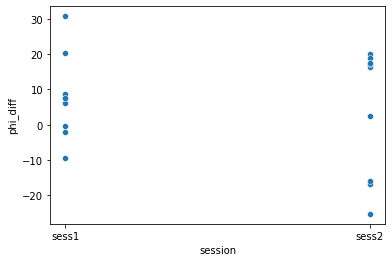

In [100]:
import pandas as pd
import seaborn as sns

trainset1_phi = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/Phi/trainset1_estPhi.csv').query('ifold=="6fold"')
trainset2_phi = pd.read_csv(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/Phi/trainset2_estPhi.csv').query('ifold=="6fold"')

trainset1_phi['session'] = 'sess1'
trainset2_phi['session'] = 'sess2'

phi = pd.concat([trainset1_phi,trainset2_phi])
phi['phi_diff'] = phi['ec_phi'] - phi['vmpfc_phi']
sns.scatterplot(data=phi,x='session',y='phi_diff')

phi_diff_sess1 = abs(phi.query("session=='sess1'")['phi_diff']).to_list()
phi_diff_sess2 = abs(phi.query("session=='sess2'")['phi_diff']).to_list()
from scipy.stats import ttest_ind

t,p = ttest_ind(phi_diff_sess1,phi_diff_sess2)
print('p:',round(p,3))

# add covariate:Age

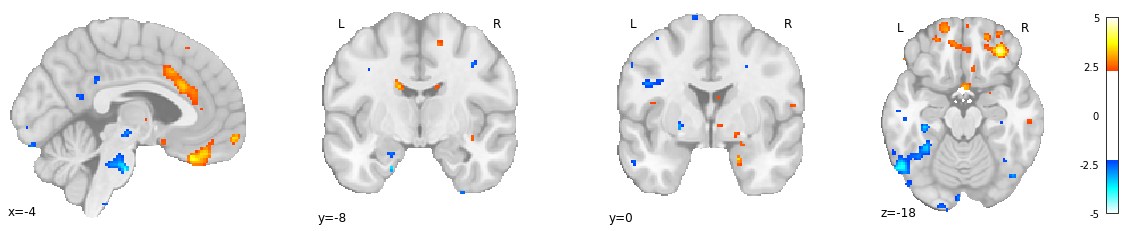

In [29]:
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/all/'
                    r'Age/2ndLevel/_contrast_id_ZF_0004/spmT_0002.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[11],threshold=2.3,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
#              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-4],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[0],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-18],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)

# add covariate:2D acc

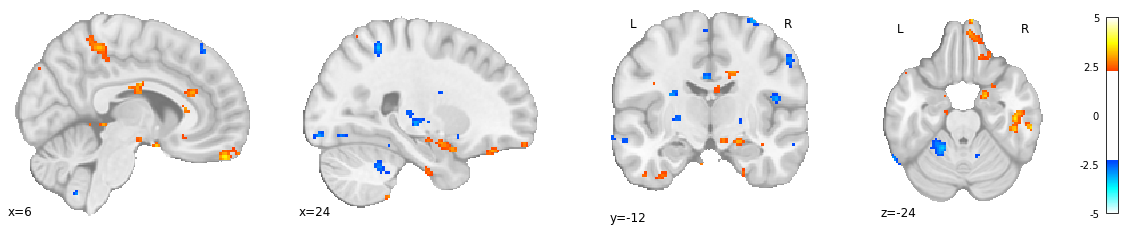

In [30]:
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/all/'
                    r'Acc/2ndLevel/_contrast_id_ZF_0004/spmT_0002.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[11],threshold=2.3,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
#              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[6],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[24],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-12],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-24],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)

# add covariates: age and acc

### Age

ValueError: File not found: '/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/all/Age_plus_Acc/2ndLevel/_contrast_id_ZF_0004/spmT_0002.nii'

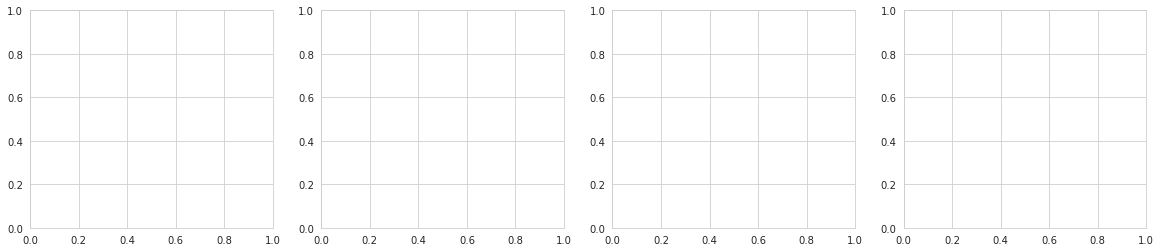

In [21]:
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/all/'
                    r'Age_plus_Acc/2ndLevel/_contrast_id_ZF_0004/spmT_0002.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

cut_coords = [-4,2,-18]

#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[11],threshold=2.3,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
#              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-4],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[0],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-18],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)

### Acc

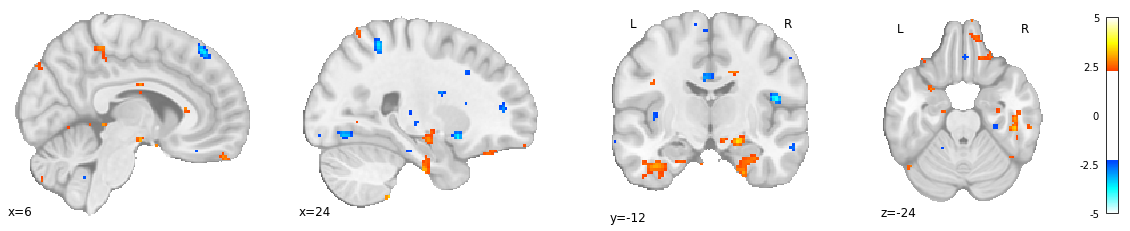

In [32]:
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/all/'
                    r'Age_plus_Acc/2ndLevel/_contrast_id_ZF_0004/spmT_0003.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[6],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[24],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-12],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-24],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)

/home/dell/.local/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


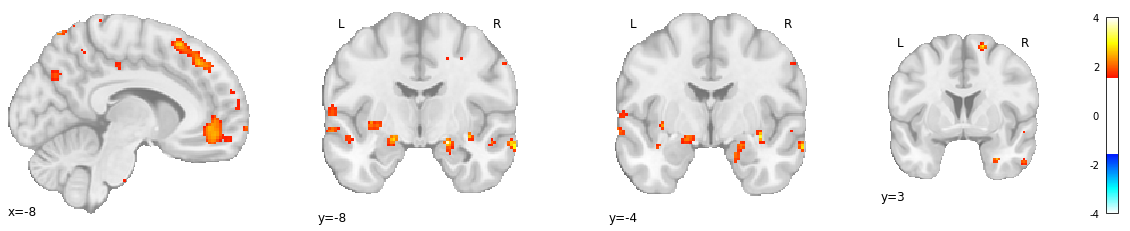

In [102]:
import numpy as np
from nilearn.plotting import plot_stat_map,plot_roi
from nilearn.image import load_img,math_img,new_img_like
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/'
                    r'hp/2ndLevel/_contrast_id_ZF_0004/spmT_0001.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

vmpfc_mask = load_img(r'/mnt/workdir/DCM/docs/Reference/Park_Grid_Coding/osfstorage-archive/data/Analysis_ROI_nii/mPFC_Grid_roi.nii')

stat_data = stat_map.get_fdata()
stat_data[stat_data<=0]  = np.float64('NaN')
stat_map = new_img_like(stat_map, stat_data)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=1.6,vmax=4,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=1.6,vmax=4,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-4],threshold=1.6,vmax=4,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[3],threshold=1.6,vmax=4,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)

# EC

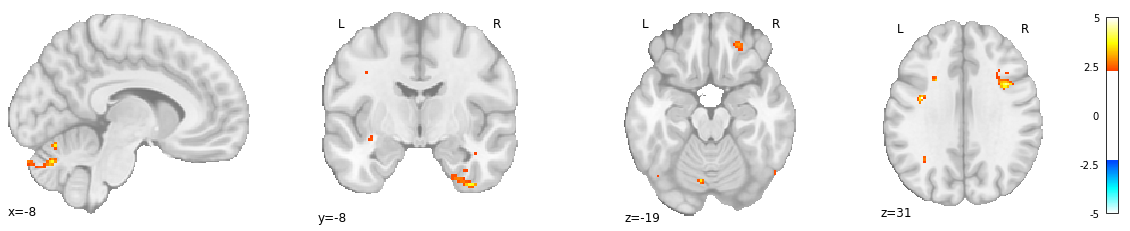

In [87]:
import numpy as np
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img,new_img_like
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/test_set/EC/group/hp/mean_spmT_align_EC_Phi.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')


stat_data = stat_map.get_fdata()
stat_data[stat_data<=0]  = np.float64('NaN')
stat_map = new_img_like(stat_map, stat_data)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-19],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[31],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)
% md
# vmpfc

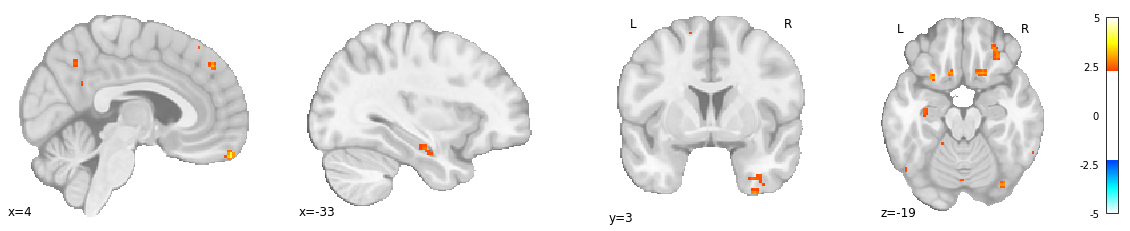

In [86]:
import numpy as np
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img,new_img_like
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/test_set/vmpfc/group/hp/mean_spmT_align_vmpfc_Phi.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')


stat_data = stat_map.get_fdata()
stat_data[stat_data<=0]  = np.float64('NaN')
stat_map = new_img_like(stat_map, stat_data)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[4],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-33],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[3],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-19],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[3],colorbar=True)

## copy data for he li

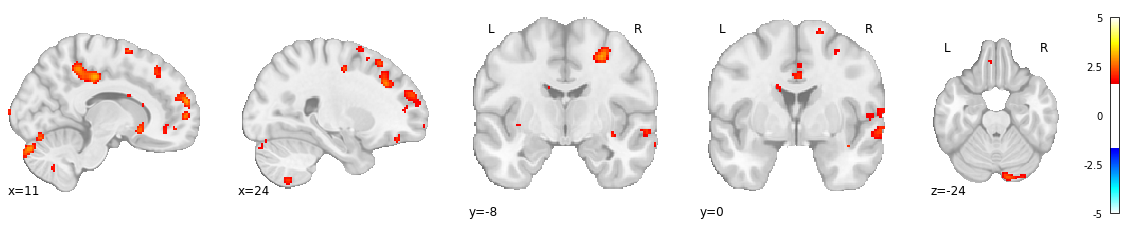

In [20]:
from nilearn.plotting import plot_stat_map,plot_glass_brain
from nilearn.image import load_img,math_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,5,figsize=[20,4])
stat_map = load_img(r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/hexagon/specificTo6/training_set/trainsetall/group/adult/2ndLevel/_contrast_id_ZF_0004/spmT_0001.nii')

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
stat_map = math_img("np.where(img<0,0,img)",img=stat_map)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[11],threshold=1.69,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
#plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[6],threshold=1.69,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
#              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[24],threshold=1.69,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=1.69,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[0],threshold=1.69,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[3],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-24],threshold=1.69,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[4],colorbar=True)

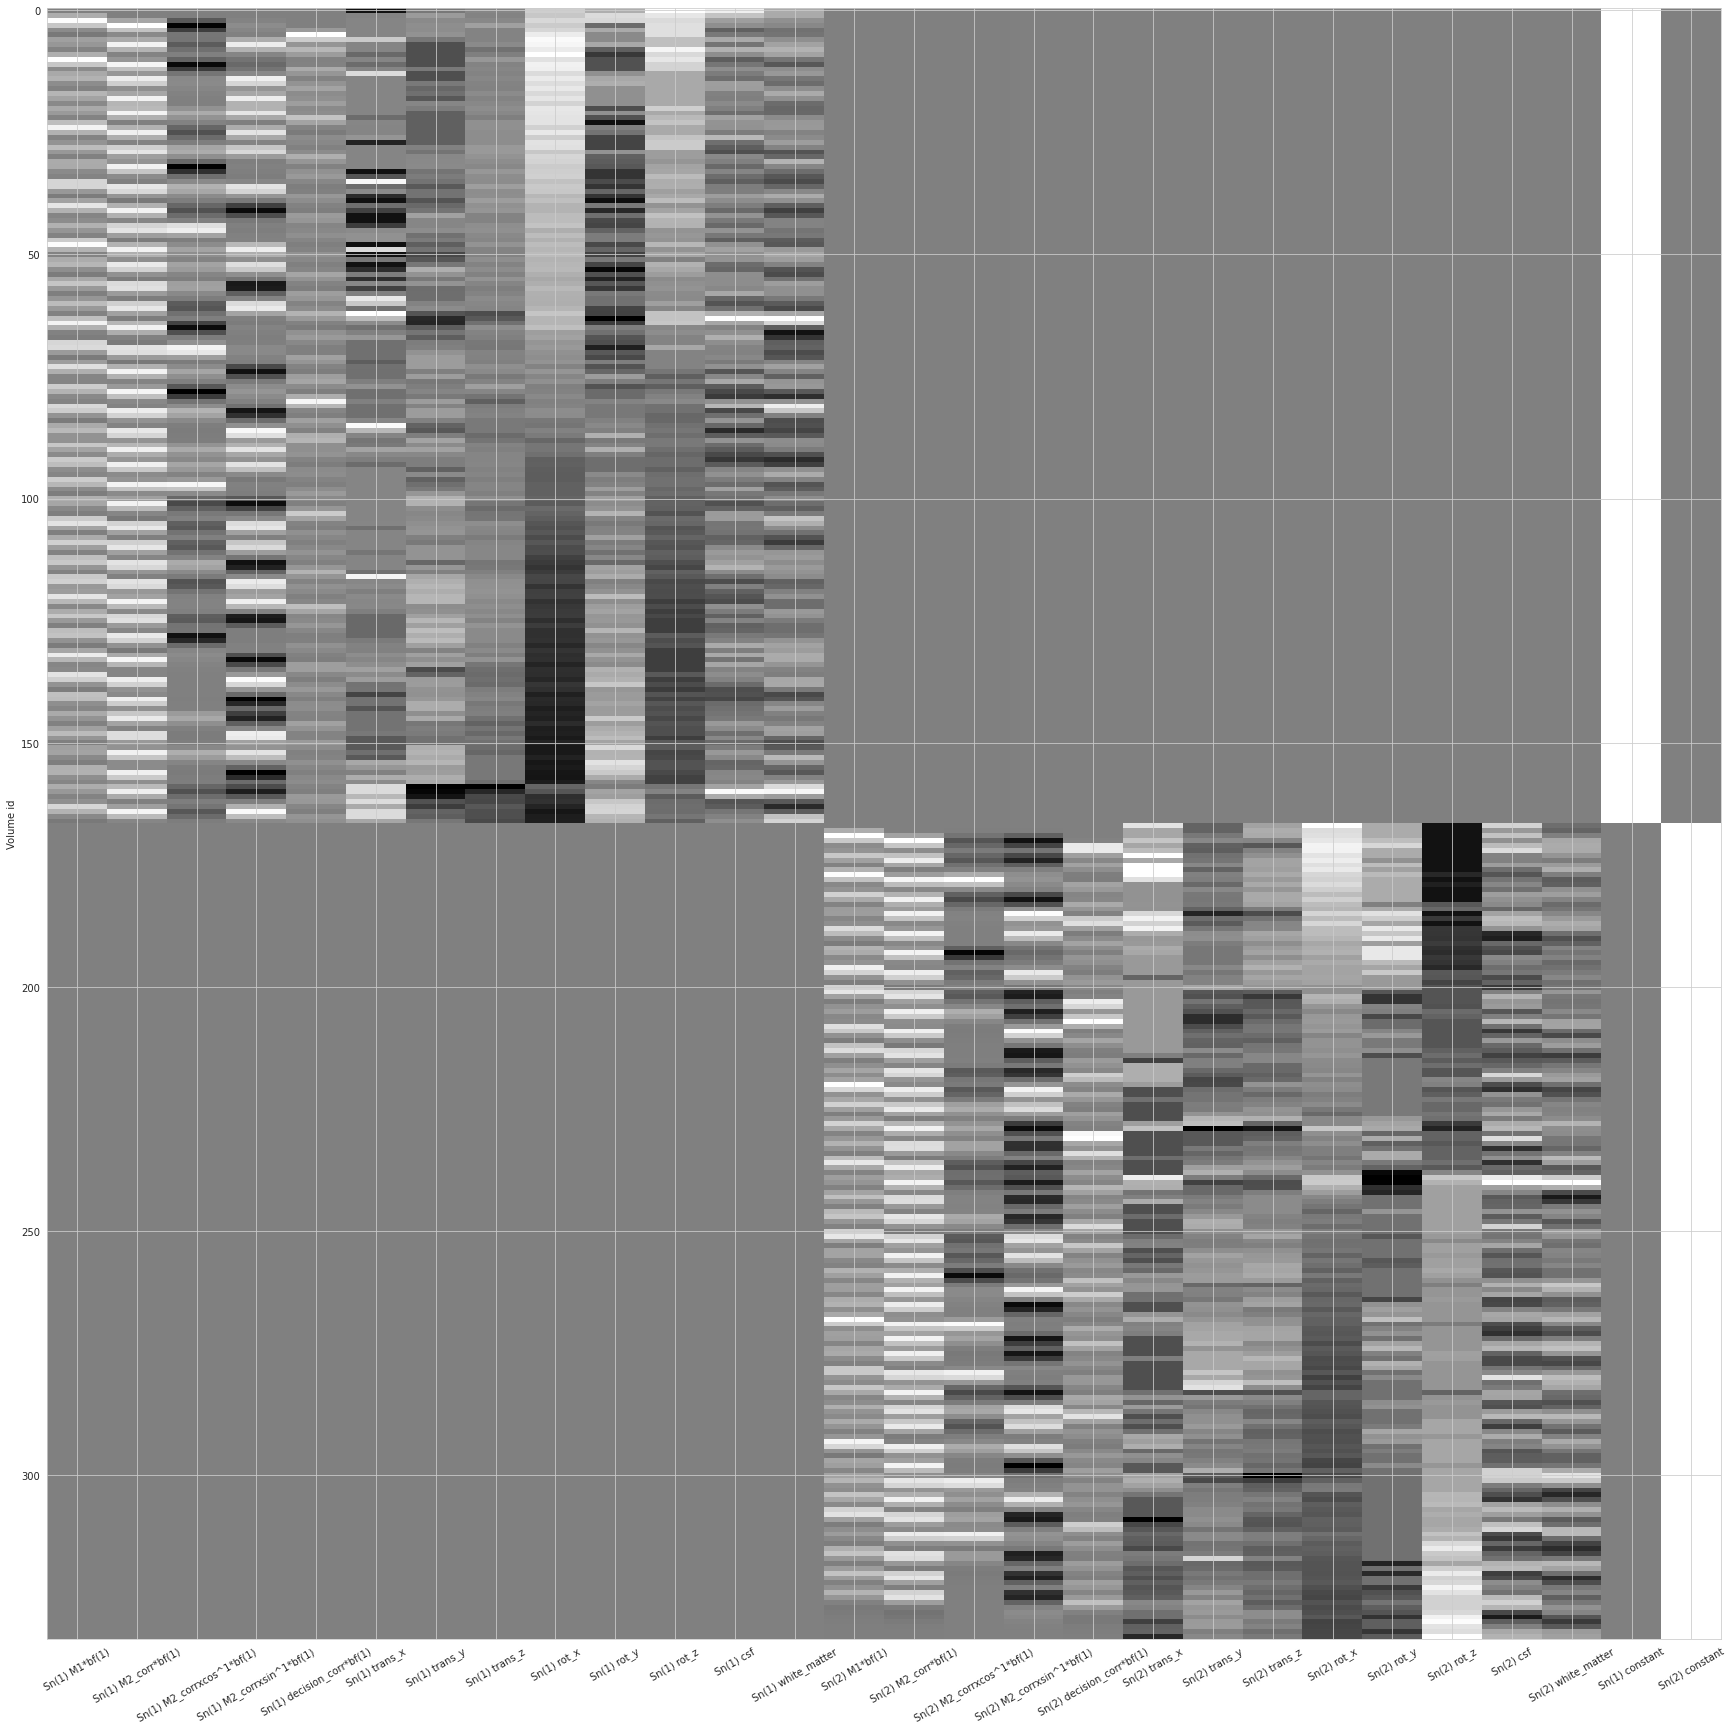

'/mnt/workdir/DCM/code/misc/spm_mat.png'

In [5]:
from scipy.io import loadmat
def plotDesignMatrix(matFile):
    import numpy as np
    import seaborn as sns
    from matplotlib import pyplot as plt
    from scipy.io import loadmat
    from os.path import join as opj
    import os

    fig_filename_full = opj(os.getcwd(), 'spm_mat.png')      # create filename

    spmmat = loadmat(matFile,                           # Using scipy's loadmat function we can access SPM.mat
struct_as_record=False)

    # normalize data
    designMatrix = spmmat['SPM'][0][0].xX[0][0].X[:,:]
    names = [i[0] for i in spmmat['SPM'][0][0].xX[0][0].name[0]][:]

    normed_design = designMatrix / np.abs(designMatrix).max(axis=0)

    # save figure
    fig_f, ax_f = plt.subplots(figsize=(30, 30))
    plt.imshow(normed_design, aspect='auto', cmap='gray', interpolation='none')
    ax_f.set_ylabel('Volume id')
    ax_f.set_xticks(np.arange(len(names)))
    ax_f.set_xticklabels(names, rotation=30)
    plt.show()
    #fig_f.savefig(r'/mnt/workdir/DCM/tmp/design_matrix.png')
    plt.close(fig_f)

    return fig_filename_full
spm_file = r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/working_dir/game2/separate_hexagon_2phases_correct_trials/Setall/6fold/work_1st/_subj_id_193/level1estimate/SPM.mat'
plotDesignMatrix(spm_file)

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
from os.path import join as opj
import os

spm_file = r'/mnt/workdir/DCM/BIDS/derivatives/SPM/sub-099/SPM.mat'

spmmat = loadmat(spm_file,struct_as_record=False)
designMatrix = spmmat['SPM'][0][0].xX[0][0].nKX
names = [i[0] for i in spmmat['SPM'][0][0].xX[0][0].name[0]]

design_matrix = pd.DataFrame(designMatrix,columns=names)
design_matrix

,Sn(1) M1*bf(1),Sn(1) M2_corr*bf(1),Sn(1) M2_corrxsin^1*bf(1),Sn(1) M2_corrxcos^1*bf(1),Sn(1) M2_error*bf(1),Sn(1) decision_corr*bf(1),Sn(1) decision_corrxsin^1*bf(1),Sn(1) decision_corrxcos^1*bf(1),Sn(1) decision_error*bf(1),Sn(1) pressButton*bf(1),Sn(1) trans_x,Sn(1) trans_y,Sn(1) trans_z,Sn(1) rot_x,Sn(1) rot_y,Sn(1) rot_z,Sn(1) constant
0,-0.039194,0.010605,-0.240763,-0.148484,0.013541,0.014235,-0.040415,-0.062842,0.017877,0.061010,0.030109,-0.029191,-0.101882,-0.061772,-0.017446,0.059752,1.000000
1,0.050381,-0.022011,-0.271397,-0.146979,0.013676,0.013659,-0.040519,-0.062519,0.017923,0.059457,0.025147,0.002049,-0.028546,-0.044748,-0.023663,0.044978,0.905176
2,0.793316,0.210876,-0.033731,-0.144009,0.013945,0.004372,-0.047975,-0.061878,0.018014,0.040383,-0.030225,-0.028287,-0.029121,-0.026990,0.018413,0.009125,0.900335
3,0.448341,0.919023,0.682573,-0.139881,0.014343,0.062672,0.005126,-0.060921,0.018150,0.101071,-0.050101,-0.010939,0.000029,-0.015030,0.023715,-0.033356,0.899990
4,0.001407,0.407772,0.178869,-0.139564,0.014861,0.321777,0.237357,-0.059668,0.018330,1.000000,-0.084554,-0.028339,0.008701,-0.008685,0.028769,-0.024414,0.900134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.008400,0.353176,0.031942,-0.492861,0.017490,0.175863,-0.065102,-0.273610,0.017478,0.755226,-0.205755,-0.195502,-0.166963,-0.077254,0.170413,0.046000,0.900134
160,0.141000,-0.078006,0.176689,-0.165228,0.017322,0.093064,-0.041278,-0.178159,0.017181,0.516216,-0.175038,-0.156124,-0.219658,-0.099052,0.177811,0.180911,0.899990
161,0.545086,0.478953,-0.038436,0.552843,0.017193,-0.022173,-0.008415,-0.061992,0.016952,0.038251,-0.274975,-0.110546,-0.183231,-0.179178,0.251943,0.080700,0.900335
162,0.171228,0.654064,-0.102939,0.710656,0.017105,-0.029734,-0.008566,0.003351,0.016797,-0.128140,-0.309560,-0.088724,-0.073818,-0.185842,0.199241,0.045967,0.905176


In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
from os.path import join as opj
import os

spmmat = loadmat('/mnt/workdir/DCM/BIDS/derivatives/Nipype/working_dir/game1/separate_hexagon_2phases_correct_trials/Setall/6fold/work_1st/_subj_id_180/level1estimate/SPM.mat',
                 struct_as_record=False)

designMatrix = spmmat['SPM'][0][0].xX[0][0].X
names = [i[0] for i in spmmat['SPM'][0][0].xX[0][0].name[0]]

design_matrix = pd.DataFrame(designMatrix,columns=names)
design_matrix

,Sn(1) M1*bf(1),Sn(1) M2_corr*bf(1),Sn(1) M2_corrxcos^1*bf(1),Sn(1) M2_corrxsin^1*bf(1),Sn(1) decision_corr*bf(1),Sn(1) decision_corrxcos^1*bf(1),Sn(1) decision_corrxsin^1*bf(1),Sn(1) trans_x,Sn(1) trans_y,Sn(1) trans_z,...,Sn(6) rot_y,Sn(6) rot_z,Sn(6) csf,Sn(6) white_matter,Sn(1) constant,Sn(2) constant,Sn(3) constant,Sn(4) constant,Sn(5) constant,Sn(6) constant
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-0.033898,-0.169199,-0.037965,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
1,0.089908,0.000002,-3.225211e-22,-0.000002,0.000000,0.000000e+00,0.000000,-0.046259,-0.145439,-0.031474,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.518760,0.145696,-2.676388e-17,-0.145696,0.000000,0.000000e+00,0.000000,-0.044269,-0.157871,-0.044768,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
3,0.344664,0.512694,-9.418043e-17,-0.512694,0.002773,-5.094649e-19,-0.002773,-0.044259,-0.142089,-0.041461,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073575,0.276391,-5.077228e-17,-0.276391,0.125055,-2.297224e-17,-0.125055,-0.048565,-0.154702,-0.052192,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,-0.000290,0.000157,25.422159,11.858098,0.0,0.0,0.0,0.0,0.0,1.0
977,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,-0.000532,0.000157,55.652335,28.474110,0.0,0.0,0.0,0.0,0.0,1.0
978,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,-0.000701,0.000346,33.816421,26.170622,0.0,0.0,0.0,0.0,0.0,1.0
979,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,-0.000579,0.000268,18.543444,16.528205,0.0,0.0,0.0,0.0,0.0,1.0


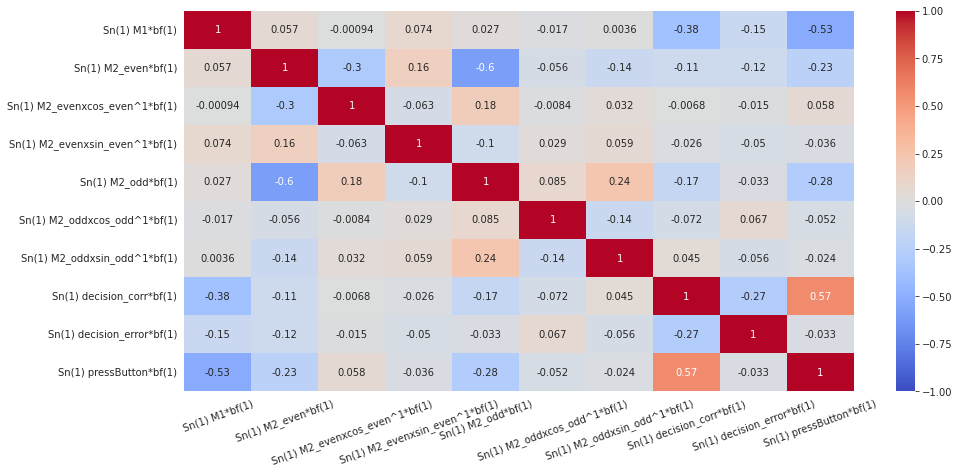

In [3]:
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
# Using scipy's loadmat function we can access SPM.mat
spmmat = loadmat('/mnt/workdir/DCM/BIDS/derivatives/Nipype/working_dir/game1/cv_train3/Setall/6fold/work_1st/_subj_id_010/level1estimate/SPM.mat',
                 struct_as_record=False)
run = 0
designMatrix = spmmat['SPM'][0][0].xX[0][0].X[:164,0+run*15:10+run*15]
names = [i[0] for i in spmmat['SPM'][0][0].xX[0][0].name[0]][0+run*15:10+run*15]

fix,ax = plt.subplots(figsize=(15,7))
designMatrix_df = pd.DataFrame(designMatrix,columns=names)
g = sns.heatmap(designMatrix_df.corr(),annot=True,vmax=1,vmin=-1,cmap='coolwarm')
g.set_xticklabels(g.get_xticklabels(),rotation=20)
plt.show()

In [13]:
import os

def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            elif entry.is_dir():
                total += get_dir_size(entry.path)
    return total


def get_directory_sizes(directory_path):
    # Get the list of directories in the specified directory
    directory_list = os.listdir(directory_path)
    directory_sizes = {}
    # Loop through the list of directories
    for directory in directory_list:
        # Get the size of the directory
        directory_size =  get_dir_size(os.path.join(directory_path, directory))
        # convert size to GB
        directory_size = directory_size / 1024 / 1024 / 1024
        directory_sizes[directory] = directory_size
    return directory_sizes

directory_path = r'/mnt/data/DCM/tmp/ToLuoYao/MEG/CTF'
directory_sizes = get_directory_sizes(directory_path)
# sort the dictionary by value
directory_sizes = {k: v for k, v in sorted(directory_sizes.items(), key=lambda item: item[1],reverse=True)}

In [14]:
print(directory_sizes)

{'sub_213': 26.51766981277615, 'sub_003': 5.5880886455997825, 'sub_028': 5.1332707945257425, 'sub_009': 4.929874507710338, 'sub_167': 4.852719437330961, 'sub_010': 4.710469654761255, 'sub_218': 4.482184872031212, 'sub_014': 4.199295589700341, 'sub_017': 4.025228570215404, 'sub_109': 3.9750998681411147, 'sub_211': 3.938532778993249, 'sub_212': 3.92304880451411, 'sub_238': 3.8930144449695945, 'sub_171': 3.892823693342507, 'sub_239': 3.888275194913149, 'sub_240': 3.88647632393986, 'sub_173': 3.883684016764164, 'sub_192': 3.883680999279022, 'sub_030': 3.880994484759867, 'sub_124': 3.8728559855371714, 'sub_040': 3.870171604678035, 'sub_089': 3.8653985867276788, 'sub_208': 3.8653983557596803, 'sub_206': 3.8653982914984226, 'sub_100': 3.8653982542455196, 'sub_083': 3.8653981471434236, 'sub_103': 3.8653980446979403, 'sub_102': 3.865398005582392, 'sub_207': 3.8653979999944568, 'sub_055': 3.8653978863731027, 'sub_106': 3.86539788171649, 'sub_093': 3.865397861227393, 'sub_112': 3.865397835150361,

In [17]:
from nilearn import image

roi1 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/harvardoxford-subcortical_prob_Left Hippocampus.nii.gz')
roi2 = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/')

# merge two masks into one mask
roi = image.math_img('np.logical_or(img1,img2)', img1=roi1, img2=roi2)
roi.to_filename(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_merge_MNI152NL.nii.gz')

In [2]:
from nilearn import image

roi = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/harvardoxford-subcortical_prob_Right Hippocampus.nii.gz')
roi = image.binarize_img(roi,5)
roi.to_filename(r'/mnt/workdir/DCM/Docs/Mask/hippocampus/rHC.nii.gz')

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


In [20]:
from nilearn import image
import numpy as np
from scipy.ndimage import binary_closing,binary_dilation

bn_atlas = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/dmPFC/MNINonL_BN_Atlas_246_2mm.nii.gz')
bn_data = bn_atlas.get_fdata()

bn_data[~np.isin(bn_data, [1,2,11, 12])] = 0
bn_data[bn_data>0] = 1
bin_bn_data = binary_closing(bn_data,iterations=1)
bn_atlas_new = image.new_img_like(bn_atlas,bin_bn_data)
bn_atlas_new.to_filename(r'/mnt/workdir/DCM/Docs/Mask/dmPFC/BN_dmPFC_middle.nii.gz')

In [ ]:
import os
import numpy as np
import pandas as pd
from os.path import join
from analysis.mri.event.base import GAME1EV


# get the angle distribution of dogfall trials

class GAME1EV_tmp(GAME1EV):
    def __init__(self, behDataPath):
        GAME1EV.__init__(self, behDataPath)

    def label_trial_corr(self):
        self.behData = self.behData.fillna('None')
        if self.dformat == 'trial_by_trial':
            keyResp_list = self.behData['resp.keys']
        elif self.dformat == 'summary':
            keyResp_tmp = self.behData['resp.keys_raw']
            keyResp_list = []
            for k in keyResp_tmp:
                if k == 'None':
                    keyResp_list.append(k)
                else:
                    keyResp_list.append(k[1])
        else:
            raise Exception("You need specify behavioral data format.")

        angle = self.behData['angles']
        trial_corr = []
        fr = []
        fresult = []
        for keyResp, row in zip(keyResp_list, self.behData.itertuples()):
            rule = row.fightRule
            fr.append(rule)
            if rule == '1A2D':
                fight_result = row.pic1_ap - row.pic2_dp
                if fight_result > 0:
                    correctAns = 1
                elif fight_result < 0:
                    correctAns = 2
                elif fight_result == 0:
                    correctAns = -1
                else:
                    raise Exception("fight result is not a number.")
            elif rule == '1D2A':
                fight_result = row.pic2_ap - row.pic1_dp
                if fight_result > 0:
                    correctAns = 2
                elif fight_result < 0:
                    correctAns = 1
                elif fight_result == 0:
                    correctAns = -1
                else:
                    raise Exception("fight result is not a number.")
            else:
                raise Exception("None of rule have been found in the file.")
            fresult.append(fight_result)
        return fr, fresult, angle


ifolds = [6]
task = 'game1'
glm_type = 'hexagon_spct'
template = {'save_dir': r'/mnt/workdir/DCM/BIDS/derivatives/Events/{}/' + glm_type + '/sub-{}/{}fold',
            'event_file': 'sub-{}_task-{}_run-{}_events.tsv'}

if task == 'game1':
    runs = range(1, 7)
    template['behav_path'] = '/mnt/workdir/DCM/sourcedata/sub_{}/Behaviour/' \
                             'fmri_task-game1/sub-{}_task-{}_run-{}.csv'

participants_data = pd.read_csv('/mnt/workdir/DCM/BIDS/participants.tsv', sep='\t')
subjects = participants_data.query(f'{task}_fmri>=0.5')['Participant_ID'].str.split('-').str[-1].str.zfill(3)

df = pd.DataFrame()
for subj in subjects:
    print(f'----sub-{subj}----')

    for ifold in ifolds:
        save_dir = template['save_dir'].format(task, subj, ifold)
        os.makedirs(save_dir, exist_ok=True)

        for idx in runs:
            run_id = str(idx)
            behav_path = template['behav_path'].format(subj, subj, task, run_id)
            game1ev = GAME1EV_tmp(behav_path)
            fr, fresult, angle = game1ev.label_trial_corr()
            df = df.append(pd.DataFrame({'sub_id': subj, 'fightRule': fr, 'fightResult': fresult, 'angle': angle}),
                           ignore_index=True)
df.to_csv('/mnt/workdir/DCM/Result/validation_trial_bias/dogfall.csv', index=False)

# get the angle distribution of dogfall trials

df_dog_fall = df[df['fightResult'] == 0]
angles = df_dog_fall['angle'].to_list()
#plotAngleHist(angles)
#plotAngleRadar(angles)

In [29]:
import plotly.express as px

df_dog_fall['frequency'] = df_dog_fall.groupby('angle')['angle'].transform('count')
fig = px.line_polar(df_dog_fall, r='frequency', theta='angle', line_close=False)
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_dog_fall['frequency'].max()]
        )),
    showlegend=False
)

fig.update_traces(fill='toself')
fig.update_layout(title='Angle Distribution')
fig.show()


<ipython-input-29-46283d8c5dce>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

